In [19]:
import pandas as pd

In [20]:
ads=pd.read_csv(r"C:\Users\PRIYA\WINDOWS FILE\Desktop\DATASCIENCE\CASE STUDY\Ads_purchase logistic regression\Social_Network_Ads.csv")
ads.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


User id is a unique number so i can delete it.

In [21]:
ads.drop(["User ID"],axis=1,inplace=True)

In [22]:
ads.shape

(400, 4)

In [23]:
ads.keys()

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [24]:
ads=pd.get_dummies(ads)
ads.head()

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1


In [25]:
ads.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
Gender_Female      0
Gender_Male        0
dtype: int64

No NaN values ,that's a relief

And also categorical value changed to numeric form

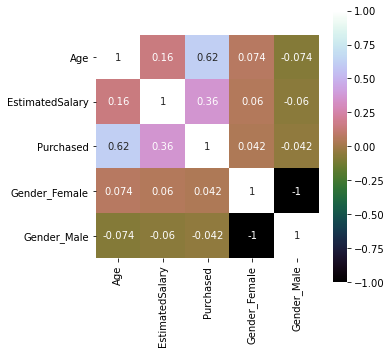

In [26]:
#import seaborn as sns
import matplotlib.pyplot as plt
corr = ads.corr()
corr_mat=ads.corr(method='pearson')
plt.figure(figsize=(5,5))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

In [29]:
#splitting the data in train and test split
from sklearn.model_selection import train_test_split
train , test = train_test_split(ads , test_size = 0.2, random_state=0)
predictions = ['Age' , 'EstimatedSalary', 'Gender_Male' , 'Gender_Female']
x_train = train[predictions]
y_train = train['Purchased']
x_test = test[predictions]
y_test = test['Purchased']

In [30]:
x_train

,Age,EstimatedSalary,Gender_Male,Gender_Female
336,58,144000,1,0
64,59,83000,0,1
55,24,55000,0,1
106,26,35000,0,1
300,58,38000,0,1
...,...,...,...,...
323,48,30000,0,1
192,29,43000,1,0
117,36,52000,1,0
47,27,54000,0,1


In [32]:
y_train

336    1
64     0
55     0
106    0
300    1
      ..
323    1
192    0
117    0
47     0
172    0
Name: Purchased, Length: 320, dtype: int64

In [34]:
x_test

,Age,EstimatedSalary,Gender_Male,Gender_Female
132,30,87000,1,0
309,38,50000,0,1
341,35,75000,1,0
196,30,79000,0,1
246,35,50000,0,1
...,...,...,...,...
14,18,82000,1,0
363,42,79000,0,1
304,40,60000,0,1
361,53,34000,0,1


In [35]:
y_test

132    0
309    0
341    0
196    0
246    0
      ..
14     0
363    0
304    0
361    1
329    1
Name: Purchased, Length: 80, dtype: int64

In [36]:
#applying the model
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression()
logr.fit(x_train,y_train)

LogisticRegression()

In [39]:
pred=logr.predict(x_test)

In [40]:
score=logr.score(x_train,y_train)
print(score)

0.621875


In [41]:
score = logr.score(x_test, y_test)
print (score)

0.725


In [42]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,pred)
print (cm)

[[58  0]
 [22  0]]


accuracy is low ,needs some improvement

trying to improve the accuracy

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xx_train = sc.fit_transform(x_train)
xx_test = sc.transform(x_test)

In [44]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state=0)
classifier.fit(xx_train, y_train)
classifier.score(xx_train,y_train)

0.896875

In [45]:
y_pred = classifier.predict(xx_test)

In [47]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [46]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred)
print (cm1)


[[55  3]
 [ 1 21]]
